## 事故与异常识别

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('处理文档.xlsx', sheet_name = 'Sheet1', skiprows=3)

df = df.rename(columns={'饲喂日期': 'Date', 
                        '每日采食总量(Kg)': 'Food/kg', 
                        '每日喂水总量(L)': 'Water/L', 
                        '水料比': 'Ratio', 
                        '事故数': 'n_case',
                        '转舍前日龄':'before_age', 
                        '转舍日龄':'after_age', 
                        '总日龄': 'total_age', 
                        '存栏数': 'num',
                        '均采食量/kg': 'avg_food_kg', 
                        '均喂水量/L': 'avg_water_l', 
                        '应采食量/kg': 'reg_food_kg', 
                        })

df['y_bool'] = np.where(df['n_case'] > 0, 1, 0)
df['Date'] = pd.to_datetime(df['Date'])

df = df.iloc[::-1].reset_index(drop=True)
# Get x values for Disease event
mask = df['y_bool'] == 1
x_position = df.loc[mask, 'Date']

In [3]:
df.columns

Index(['Date', 'Food/kg', 'Water/L', 'Ratio', 'before_age', 'after_age',
       'total_age', 'num', 'avg_food_kg', 'avg_water_l', 'reg_food_kg',
       'n_case', '事故类型', 'y_bool'],
      dtype='object')

In [4]:
dates = pd.date_range(start='2025-08-25', end='2025-12-15', freq='D')

In [5]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
df

,Date,Food/kg,Water/L,Ratio,before_age,after_age,total_age,num,avg_food_kg,avg_water_l,reg_food_kg,n_case,事故类型,y_bool
0,2025-08-26,86.40,380.0,4.40,25,1,26,828,0.10,0.46,0.25,0,NaN,0
1,2025-08-27,116.40,552.0,4.74,25,2,27,827,0.14,0.67,0.25,0,NaN,0
2,2025-08-28,146.40,664.0,4.54,25,3,28,827,0.18,0.80,0.25,0,NaN,0
3,2025-08-29,186.00,784.0,4.22,25,4,29,827,0.22,0.95,0.25,0,NaN,0
4,2025-08-30,262.00,1012.0,3.86,25,5,30,827,0.32,1.22,0.25,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-12-11,1848.73,5505.8,2.98,25,108,133,613,3.02,8.98,2.81,0,NaN,0
108,2025-12-12,1813.17,5193.0,2.86,25,109,134,613,2.96,8.47,2.81,0,NaN,0
109,2025-12-13,1970.73,5938.0,3.01,25,110,135,613,3.21,9.69,2.81,0,NaN,0
110,2025-12-14,1842.69,5564.8,3.02,25,111,136,512,3.60,10.87,2.81,0,NaN,0


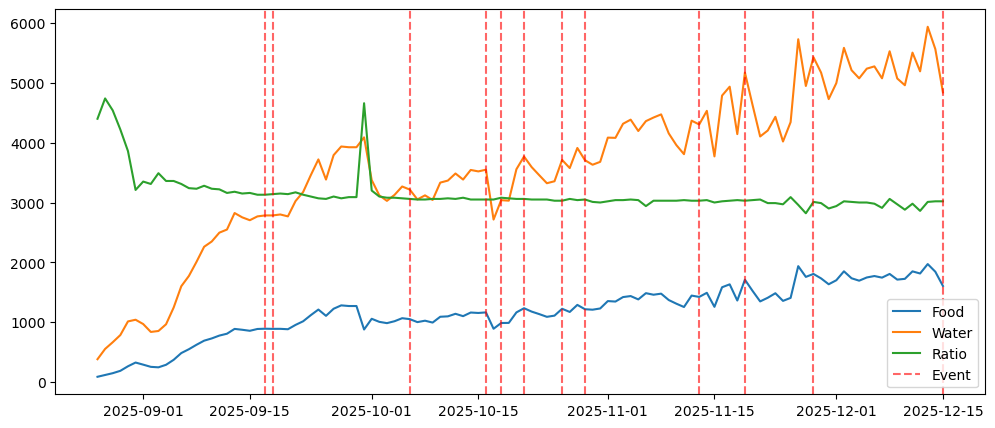

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Food/kg'], label='Food')
plt.plot(df['Date'], df['Water/L'], label='Water')
plt.plot(df['Date'], df['Ratio'] * 1000, label='Ratio')
for i, x in enumerate(x_position):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.legend()

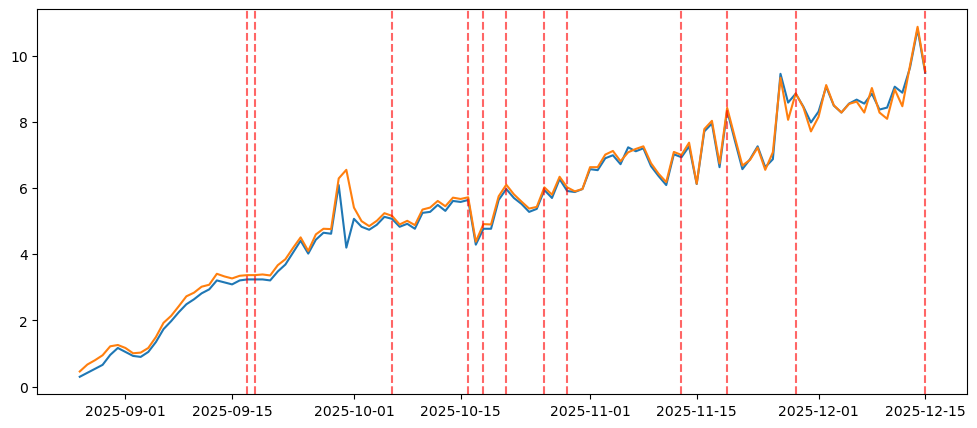

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['avg_food_kg']*3, label='Avg Food')
plt.plot(df['Date'], df['avg_water_l'], label='Avg Water')
for i, x in enumerate(x_position):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)

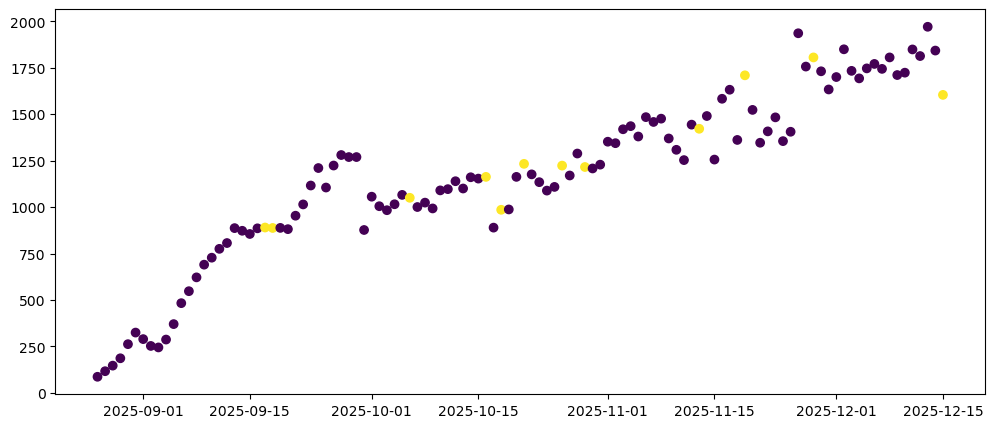

In [10]:
plt.figure(figsize=(12,5))
plt.scatter(
    df['Date'], df['Food/kg'],
    c = df['y_bool'] 
)

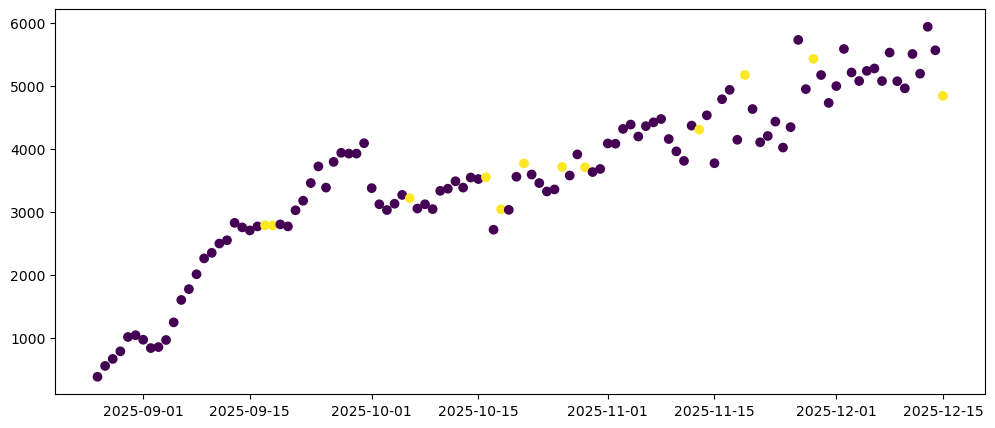

In [11]:
plt.figure(figsize=(12, 5))
plt.scatter(
    df['Date'], df['Water/L'],
    c = df['y_bool']
)

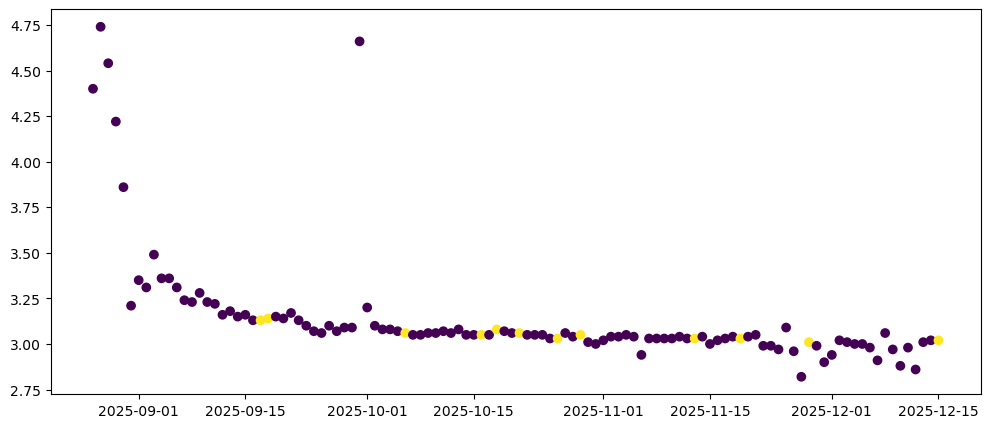

In [12]:
plt.figure(figsize=(12, 5))
plt.scatter(
    df['Date'], df['Ratio'],
    c = df['y_bool']
)

In [14]:
df

,Date,Food/kg,Water/L,Ratio,before_age,after_age,total_age,num,avg_food_kg,avg_water_l,reg_food_kg,n_case,事故类型,y_bool
0,2025-08-26,86.40,380.0,4.40,25,1,26,828,0.10,0.46,0.25,0,NaN,0
1,2025-08-27,116.40,552.0,4.74,25,2,27,827,0.14,0.67,0.25,0,NaN,0
2,2025-08-28,146.40,664.0,4.54,25,3,28,827,0.18,0.80,0.25,0,NaN,0
3,2025-08-29,186.00,784.0,4.22,25,4,29,827,0.22,0.95,0.25,0,NaN,0
4,2025-08-30,262.00,1012.0,3.86,25,5,30,827,0.32,1.22,0.25,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-12-11,1848.73,5505.8,2.98,25,108,133,613,3.02,8.98,2.81,0,NaN,0
108,2025-12-12,1813.17,5193.0,2.86,25,109,134,613,2.96,8.47,2.81,0,NaN,0
109,2025-12-13,1970.73,5938.0,3.01,25,110,135,613,3.21,9.69,2.81,0,NaN,0
110,2025-12-14,1842.69,5564.8,3.02,25,111,136,512,3.60,10.87,2.81,0,NaN,0


### 滞后相关性 - 采用总量

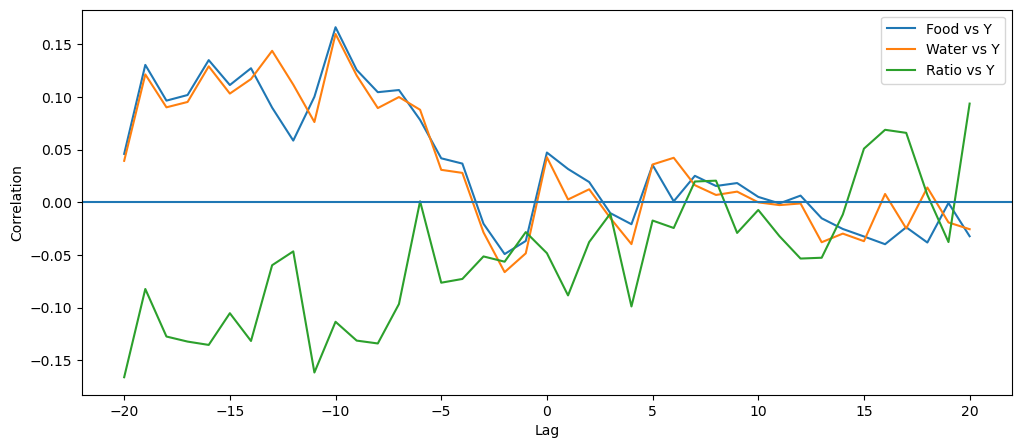

In [15]:
def lagged_corr(x, y, max_lag=20):
    """
    x 和 y 在 [-max_lag, max_lag] 范围内的滞后相关性
    """
    lags = range(-max_lag, max_lag + 1)
    corrs = []

    for lag in lags:
        corr = x.shift(lag).corr(y, method='spearman')
        corrs.append(corr)
    
    return pd.Series(corrs, index=lags)

lag_A_Y = lagged_corr(df['Food/kg'], df['y_bool'])
lag_B_Y = lagged_corr(df['Water/L'], df['y_bool'])
lag_C_Y = lagged_corr(df['Ratio'], df['y_bool'])

plt.figure(figsize=(12,5))
plt.plot(lag_A_Y.index, lag_A_Y.values, label='Food vs Y')
plt.plot(lag_B_Y.index, lag_B_Y.values, label='Water vs Y')
plt.plot(lag_C_Y.index, lag_C_Y.values, label='Ratio vs Y')
plt.axhline(0)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()

In [16]:
# df_reverse

### 滞后相关性 - 带平滑

In [17]:
window = 3

A_s = df['Food/kg'].rolling(window, center=True).mean()
B_s = df['Water/L'].rolling(window, center=True).mean()
C_s = df['Ratio'].rolling(window, center=True).mean()

lag_A_sY = lagged_corr(A_s, df['y_bool'])
lag_B_sY = lagged_corr(B_s, df['y_bool'])
lag_C_sY = lagged_corr(C_s, df['y_bool'])

In [18]:
# 指数加权移动平均
window = 3

A_s = df['Food/kg'].ewm(span=3, adjust=False).mean()
B_s = df['Water/L'].ewm(span=3, adjust=False).mean()
C_s = df['Ratio'].ewm(span=3, adjust=False).mean()

lag_A_sY = lagged_corr(A_s, df['y_bool'])
lag_B_sY = lagged_corr(B_s, df['y_bool'])
lag_C_sY = lagged_corr(C_s, df['y_bool'])

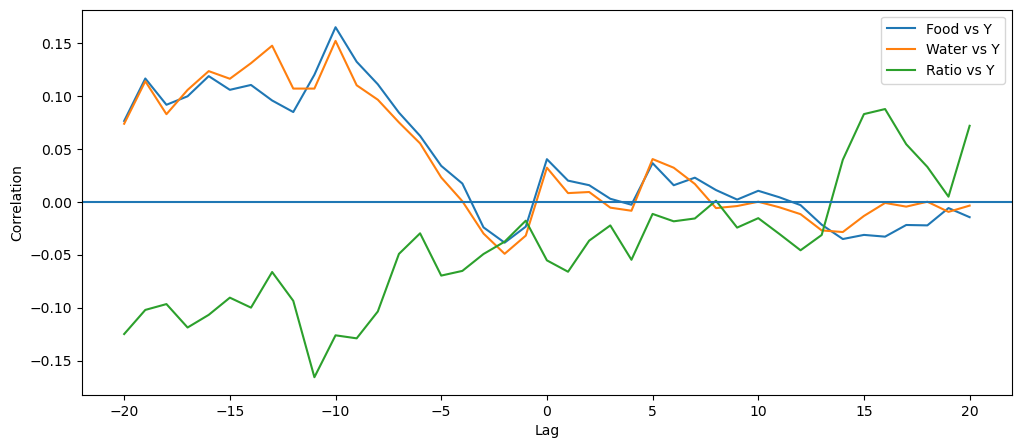

In [19]:

plt.figure(figsize=(12,5))
plt.plot(lag_A_sY.index, lag_A_sY.values, label='Food vs Y')
plt.plot(lag_B_sY.index, lag_B_sY.values, label='Water vs Y')
plt.plot(lag_C_sY.index, lag_C_sY.values, label='Ratio vs Y')
plt.axhline(0)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()

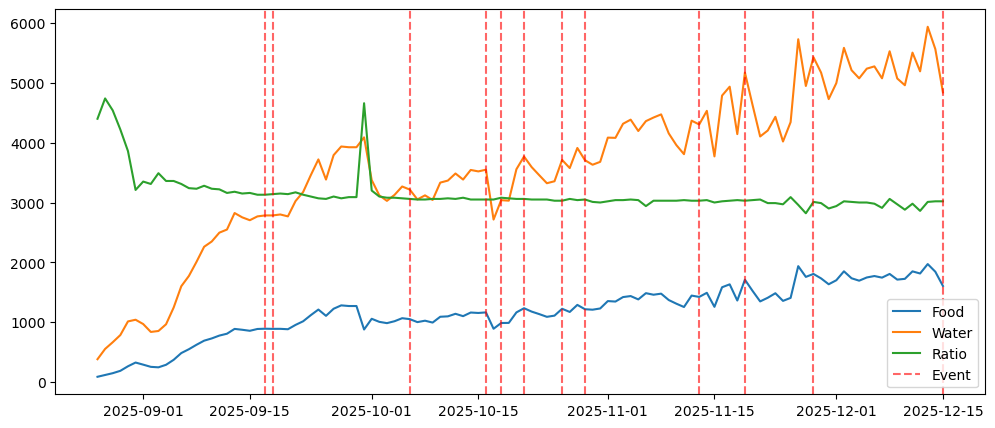

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Food/kg'], label='Food')
plt.plot(df['Date'], df['Water/L'], label='Water')
plt.plot(df['Date'], df['Ratio'] * 1000, label='Ratio')
for i, x in enumerate(x_position):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.legend()

### 回归曲线拟合，残差相关分析

利用回归曲线剔除生长趋势（总体趋势），寻找残差（置信带）与疾病事件的关联关系

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[['total_age']]
y = df['avg_food_kg'].to_numpy()

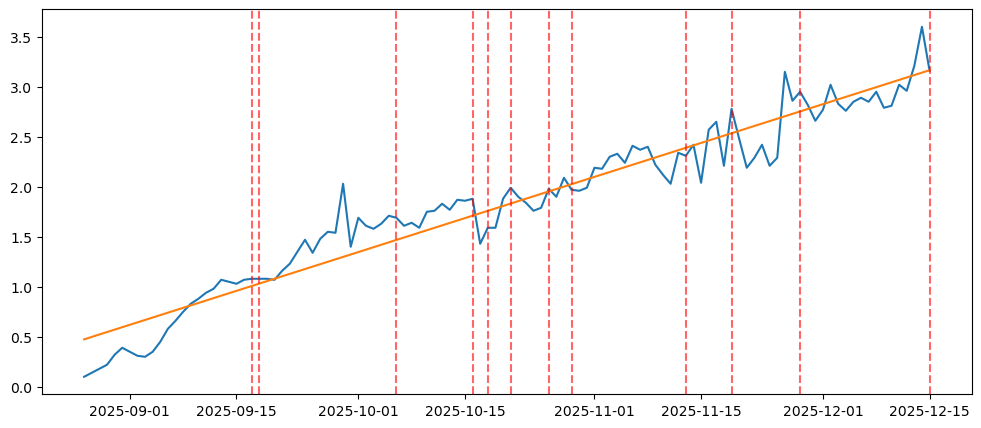

In [22]:
model_food = LinearRegression()
model_food.fit(X, y)

# 回归拟合值
df['pred_food'] = model_food.predict(X)

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['avg_food_kg'], label='Avg Food')
plt.plot(df['Date'], df['pred_food'], label='Pred Food')
for i, x in enumerate(x_position):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)

In [23]:
# ! pip install statsmodels

In [ ]:
import numpy as np
import statsmodels.api as sm

X = df[['total_age']]
y = df['avg_food_kg']

# statsmodels 显式加常数项
X_sm = sm.add_constant(X)

model_food = sm.OLS(y, X_sm).fit()

pred = model_food.get_prediction(X_sm)
pred_summary = pred.summary_frame(alpha=0.1)
print(model_food.summary())

df["food_fit"] = pred_summary["mean"]
df["ci_lower"] = pred_summary["mean_ci_lower"]
df["ci_upper"] = pred_summary["mean_ci_upper"]
df["pred_lower"] = pred_summary["obs_ci_lower"]  # 预测区间下界
df["pred_upper"] = pred_summary["obs_ci_upper"]  # 预测区间上界


                            OLS Regression Results                            
Dep. Variable:            avg_food_kg   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1505.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           5.29e-66
Time:                        09:30:14   Log-Likelihood:                 14.847
No. Observations:                 112   AIC:                            -25.69
Df Residuals:                     110   BIC:                            -20.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1561      0.055     -2.848      0.0

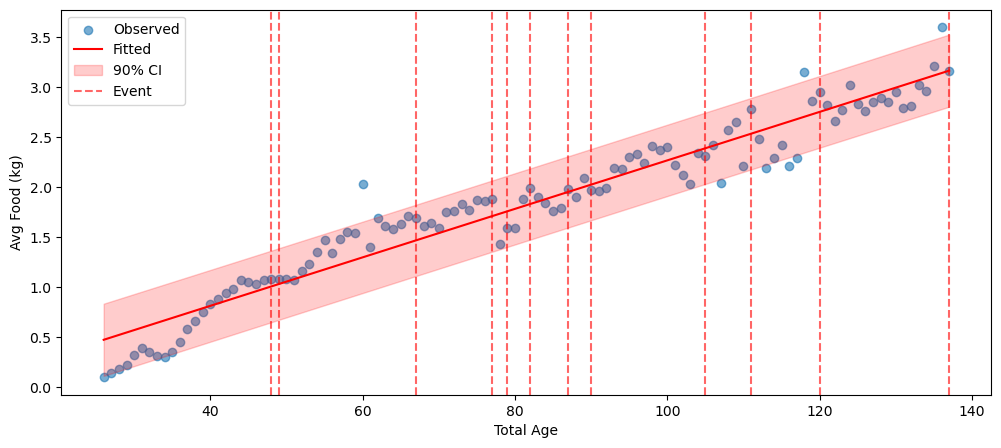

In [25]:
plt.figure(figsize=(12,5))
plt.scatter(df['total_age'], y, alpha=0.6, label="Observed")
plt.plot(df['total_age'], df['food_fit'], color='red', label="Fitted")
plt.fill_between(
    df['total_age'],
    df['pred_lower'],
    df['pred_upper'],
    color='red',
    alpha=0.2,
    label="90% CI"
)

x_mask = df.loc[mask, 'total_age']
for i, x in enumerate(x_mask):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
    
plt.legend()
plt.xlabel("Total Age")
plt.ylabel("Avg Food (kg)")
plt.show()

### 水回归



                            OLS Regression Results                            
Dep. Variable:            avg_water_l   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           2.05e-60
Time:                        09:34:11   Log-Likelihood:                -117.71
No. Observations:                 112   AIC:                             239.4
Df Residuals:                     110   BIC:                             244.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1273      0.179     -0.711      0.4

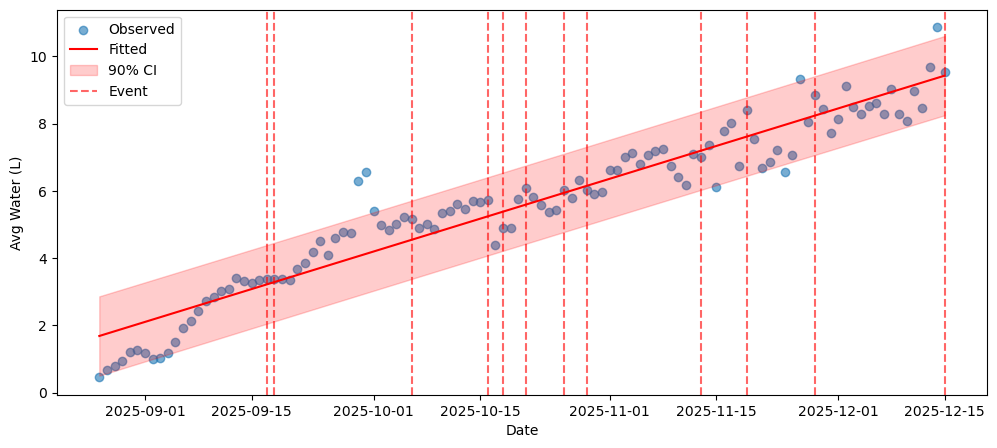

In [60]:
### 
import numpy as np
import statsmodels.api as sm

X = df[['total_age']]
y = df['avg_water_l']

# statsmodels 显式加常数项
X_sm = sm.add_constant(X)

model_water = sm.OLS(y, X_sm).fit()

pred = model_water.get_prediction(X_sm)
pred_summary = pred.summary_frame(alpha=0.1)
print(model_water.summary())

df["water_fit"] = pred_summary["mean"]
df["pred_lower_water"] = pred_summary["obs_ci_lower"]  # 预测区间下界
df["pred_upper_water"] = pred_summary["obs_ci_upper"]  # 预测区间上界

plt.figure(figsize=(12,5))
plt.scatter(df['Date'], y, alpha=0.6, label="Observed")
plt.plot(df['Date'], df['water_fit'], color='red', label="Fitted")
plt.fill_between(
    df['Date'],
    df['pred_lower_water'],
    df['pred_upper_water'],
    color='red',
    alpha=0.2,
    label="90% CI"
)

x_mask = df.loc[mask, 'Date']
for i, x in enumerate(x_mask):
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
    
plt.legend()
plt.xlabel("Date")
plt.ylabel("Avg Water (L)")
plt.show()

In [28]:
df.head()

,Date,Food/kg,Water/L,Ratio,before_age,after_age,total_age,num,avg_food_kg,avg_water_l,...,y_bool,pred_food,food_fit,ci_lower,ci_upper,pred_lower,pred_upper,water_fit,pred_lower_water,pred_upper_water
0,2025-08-26,86.4,380.0,4.40,25,1,26,828,0.10,0.46,...,0,0.474333,0.474333,0.407741,0.540925,0.113401,0.835265,1.686704,0.507941,2.865466
1,2025-08-27,116.4,552.0,4.74,25,2,27,827,0.14,0.67,...,0,0.498579,0.498579,0.432881,0.564278,0.137811,0.859348,1.756472,0.578244,2.934699
2,2025-08-28,146.4,664.0,4.54,25,3,28,827,0.18,0.80,...,0,0.522826,0.522826,0.458017,0.587635,0.162218,0.883433,1.826240,0.648538,3.003942
3,2025-08-29,186.0,784.0,4.22,25,4,29,827,0.22,0.95,...,0,0.547072,0.547072,0.483148,0.610996,0.186623,0.907521,1.896008,0.718822,3.073194
4,2025-08-30,262.0,1012.0,3.86,25,5,30,827,0.32,1.22,...,0,0.571318,0.571318,0.508275,0.634362,0.211024,0.931612,1.965776,0.789097,3.142456


### 计算余项并进行相关性分析


#### 尝试多项式回归 - 料

                            OLS Regression Results                            
Dep. Variable:            avg_food_kg   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     859.5
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           3.47e-75
Time:                        09:35:04   Log-Likelihood:                 44.377
No. Observations:                 112   AIC:                            -80.75
Df Residuals:                     108   BIC:                            -69.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8200      0.016    116.171      0.0

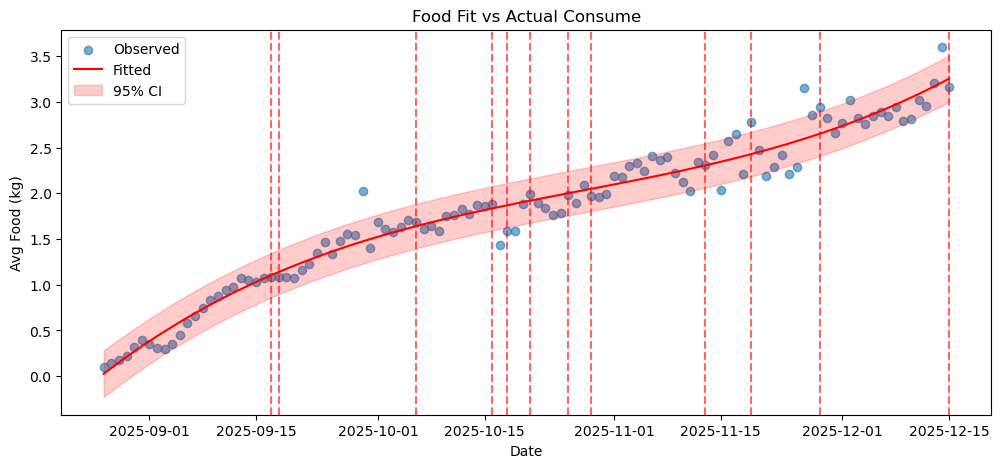

In [61]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

X = df[['total_age']]
y = df['avg_food_kg']

# 生成多项式特征（degree=2 或 3）
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# 标准化
from sklearn.preprocessing import StandardScaler
X_poly = StandardScaler().fit_transform(X_poly)

# statsmodels 回归
X_poly_sm = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly_sm).fit()
print(model_poly.summary())

pred = model_poly.get_prediction(X_poly_sm)
pred_summary = pred.summary_frame(alpha=0.15)
print(model_poly.summary())

df["food_fit"] = pred_summary["mean"]
df["ci_lower"] = pred_summary["mean_ci_lower"]
df["ci_upper"] = pred_summary["mean_ci_upper"]

df["pred_lower_food"] = pred_summary["obs_ci_lower"]  # 预测区间下界
df["pred_upper_food"] = pred_summary["obs_ci_upper"]  # 预测区间上界

plt.figure(figsize=(12,5))
plt.scatter(df['Date'], y, alpha=0.6, label="Observed")
plt.plot(df['Date'], df['food_fit'], color='red', label="Fitted")
plt.fill_between(
    df['Date'],
    df['pred_lower_food'],
    df['pred_upper_food'],
    color='red',
    alpha=0.2,
    label="95% CI"
)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Avg Food (kg)")
plt.title('Food Fit vs Actual Consume')
for i, x in enumerate(x_mask):
    plt.axvline(x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.show()

#### 尝试多项式回归 - 水

                            OLS Regression Results                            
Dep. Variable:            avg_water_l   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     668.3
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.48e-69
Time:                        09:30:15   Log-Likelihood:                -88.535
No. Observations:                 112   AIC:                             185.1
Df Residuals:                     108   BIC:                             195.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5588      0.051    108.300      0.0

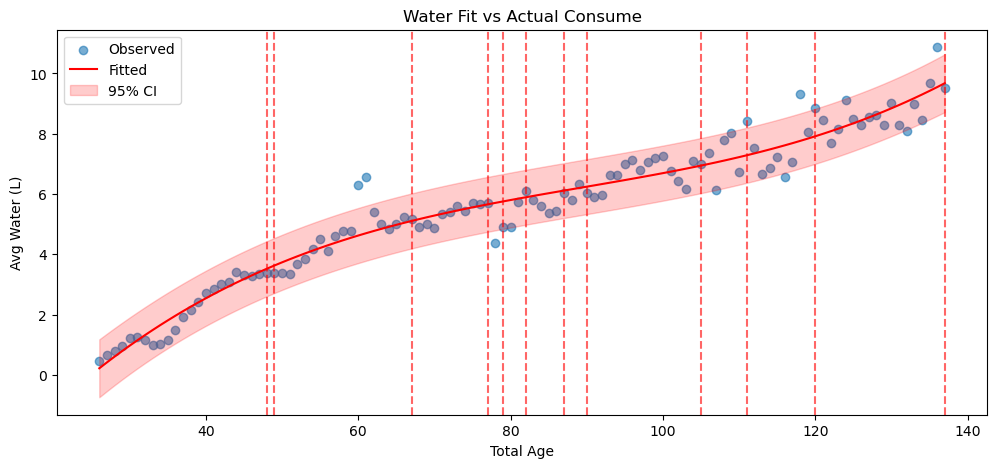

In [30]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

X = df[['total_age']]
y = df['avg_water_l']

# 生成多项式特征（degree=2 或 3）
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# 标准化
from sklearn.preprocessing import StandardScaler
X_poly = StandardScaler().fit_transform(X_poly)

# statsmodels 回归
X_poly_sm = sm.add_constant(X_poly)
model_water = sm.OLS(y, X_poly_sm).fit()
print(model_water.summary())

pred = model_water.get_prediction(X_poly_sm)
pred_summary = pred.summary_frame(alpha=0.1)
print(model_water.summary())

df["water_fit"] = pred_summary["mean"]
df["pred_lower_water"] = pred_summary["obs_ci_lower"]  # 预测区间下界
df["pred_upper_water"] = pred_summary["obs_ci_upper"]  # 预测区间上界

plt.figure(figsize=(12,5))
plt.scatter(df['total_age'], y, alpha=0.6, label="Observed")
plt.plot(df['total_age'], df['water_fit'], color='red', label="Fitted")
plt.fill_between(
    df['total_age'],
    df['pred_lower_water'],
    df['pred_upper_water'],
    color='red',
    alpha=0.2,
    label="95% CI"
)

plt.legend()
plt.xlabel("Total Age")
plt.ylabel("Avg Water (L)")
plt.title('Water Fit vs Actual Consume')
for i, x in enumerate(x_mask):
    plt.axvline(x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.show()

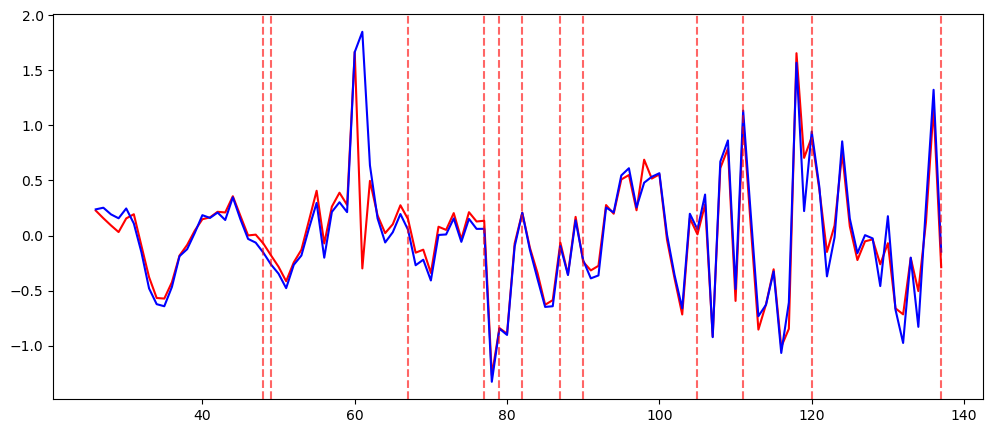

In [31]:
df['food_resi'] = df['avg_food_kg'] - df['food_fit']
df['water_resi'] = df['avg_water_l'] - df['water_fit']

plt.figure(figsize=(12, 5))
plt.plot(df['total_age'], df['food_resi']*3, color = 'red')
plt.plot(df['total_age'], df['water_resi'], color = 'blue')
for i, x in enumerate(x_mask):
    plt.axvline(x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.show()

# df.to_excel('processed_data.xlsx', sheet_name='Sheet1')

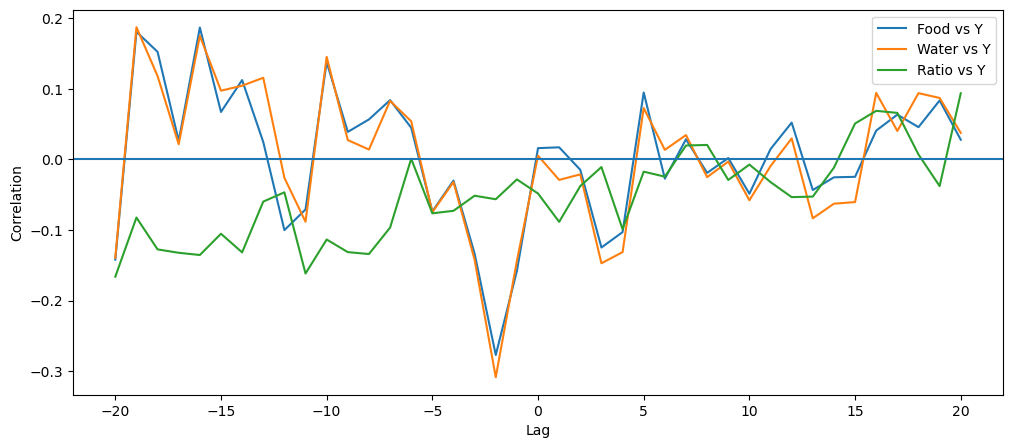

In [32]:
def lagged_corr(x, y, max_lag=20):
    """
    x 和 y 在 [-max_lag, max_lag] 范围内的滞后相关性
    """
    lags = range(-max_lag, max_lag + 1)
    corrs = []

    for lag in lags:
        corr = x.shift(lag).corr(y, method='spearman')
        corrs.append(corr)
    
    return pd.Series(corrs, index=lags)

lag_A_Y = lagged_corr(df['food_resi'], df['y_bool'])
lag_B_Y = lagged_corr(df['water_resi'], df['y_bool'])
lag_C_Y = lagged_corr(df['Ratio'], df['y_bool'])

plt.figure(figsize=(12,5))
plt.plot(lag_A_Y.index, lag_A_Y.values, label='Food vs Y')
plt.plot(lag_B_Y.index, lag_B_Y.values, label='Water vs Y')
plt.plot(lag_C_Y.index, lag_C_Y.values, label='Ratio vs Y')
plt.axhline(0)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()

In [33]:
print(f'相关性最强：提前天数{abs(lag_A_Y).idxmax()}；系数{abs(lag_A_Y).max()}')

相关性最强：提前天数-2；系数0.2772350152366496


从图中看，出现滞后预警的情况--原因？？

In [34]:
# lag_A_Y

#### 尝试带平滑

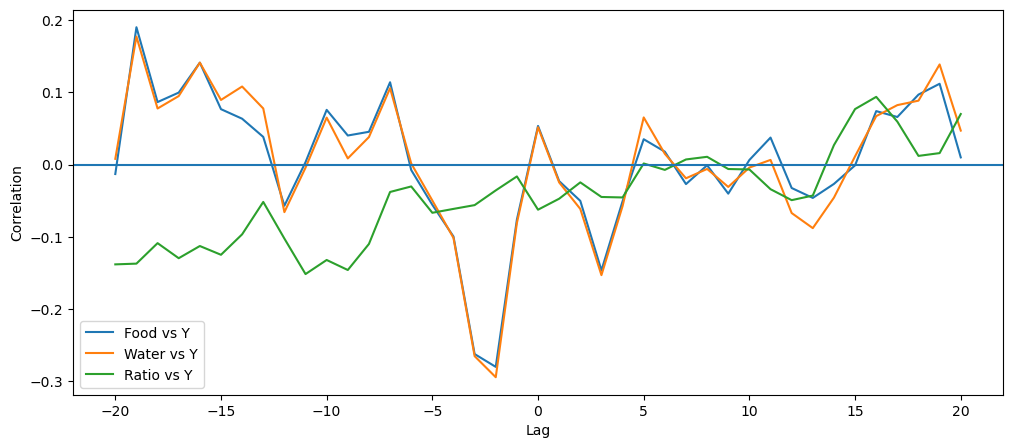

In [35]:
def lagged_corr(x, y, max_lag=20):
    """
    x 和 y 在 [-max_lag, max_lag] 范围内的滞后相关性
    """
    lags = range(-max_lag, max_lag + 1)
    corrs = []

    for lag in lags:
        corr = x.shift(lag).corr(y, method='spearman')
        corrs.append(corr)
    
    return pd.Series(corrs, index=lags)

window = 2

A_s = df['food_resi'].rolling(window, center=True).mean()
B_s = df['water_resi'].rolling(window, center=True).mean()
C_s = df['Ratio'].rolling(window, center=True).mean()

lag_A_Y = lagged_corr(A_s, df['y_bool'])
lag_B_Y = lagged_corr(B_s, df['y_bool'])
lag_C_Y = lagged_corr(C_s, df['y_bool'])

plt.figure(figsize=(12,5))
plt.plot(lag_A_Y.index, lag_A_Y.values, label='Food vs Y')
plt.plot(lag_B_Y.index, lag_B_Y.values, label='Water vs Y')
plt.plot(lag_C_Y.index, lag_C_Y.values, label='Ratio vs Y')
plt.axhline(0)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()

### 异常分析

In [36]:
import matplotlib.pyplot as plt

Q1 = df['food_resi'].quantile(0.25)
Q3 = df['food_resi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['food_resi'] < lower_bound) |
    (df['food_resi'] > upper_bound)
]

outliers[['food_resi', 'y_bool']]

,food_resi,y_bool
34,0.556022,0
52,-0.422896,0
85,0.350300,1
92,0.551663,0
110,0.387736,0


In [37]:
import matplotlib.pyplot as plt

Q1 = df['water_resi'].quantile(0.25)
Q3 = df['water_resi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['water_resi'] < lower_bound) |
    (df['water_resi'] > upper_bound)
]

outliers[['water_resi', 'y_bool']]

,water_resi,y_bool
34,1.664744,0
35,1.849566,0
52,-1.327990,0
85,1.133673,1
92,1.567941,0
110,1.322891,0


### 构建逻辑回归模型

In [38]:
import pandas as pd
df = pd.read_excel('processed_data.xlsx', sheet_name='Sheet1')

In [39]:
df

,Unnamed: 0,Date,Food/kg,Water/L,Ratio,before_age,after_age,total_age,num,avg_food_kg,...,ci_upper,pred_lower,pred_upper,water_fit,pred_lower_water,pred_upper_water,pred_lower_food,pred_upper_food,food_resi,water_resi
0,0,2025-08-26,86.40,380.0,4.40,25,1,26,828,0.10,...,0.112523,0.113401,0.835265,0.222629,-0.736959,1.182216,-0.231321,0.280575,0.075373,0.237371
1,1,2025-08-27,116.40,552.0,4.74,25,2,27,827,0.14,...,0.169940,0.137811,0.859348,0.417737,-0.534682,1.370156,-0.166259,0.341813,0.052223,0.252263
2,2,2025-08-28,146.40,664.0,4.54,25,3,28,827,0.18,...,0.226210,0.162218,0.883433,0.608047,-0.338045,1.554138,-0.102925,0.401772,0.030577,0.191953
3,3,2025-08-29,186.00,784.0,4.22,25,4,29,827,0.22,...,0.281361,0.186623,0.907521,0.793634,-0.146906,1.734174,-0.041277,0.460458,0.010409,0.156366
4,4,2025-08-30,262.00,1012.0,3.86,25,5,30,827,0.32,...,0.335422,0.211024,0.931612,0.974577,0.038877,1.910277,0.018727,0.517880,0.051697,0.245423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,2025-12-11,1848.73,5505.8,2.98,25,108,133,613,3.02,...,3.155015,2.708388,3.428976,9.180711,8.245011,10.116411,2.838320,3.337473,-0.067896,-0.200711
108,108,2025-12-12,1813.17,5193.0,2.86,25,109,134,613,2.96,...,3.200013,2.732479,3.453377,9.299371,8.358831,10.239911,2.877375,3.379110,-0.168242,-0.829371
109,109,2025-12-13,1970.73,5938.0,3.01,25,110,135,613,3.21,...,3.246477,2.756567,3.477782,9.421478,8.475386,10.367570,2.917342,3.422038,0.040310,0.268522
110,110,2025-12-14,1842.69,5564.8,3.02,25,111,136,512,3.60,...,3.294427,2.780652,3.502189,9.547109,8.594690,10.499528,2.958227,3.466300,0.387736,1.322891


In [40]:
df['food_resi_3lag'] = df['food_resi'].shift(3)
df['water_resi_3lag'] = df['water_resi'].shift(3)

In [41]:
df

,Unnamed: 0,Date,Food/kg,Water/L,Ratio,before_age,after_age,total_age,num,avg_food_kg,...,pred_upper,water_fit,pred_lower_water,pred_upper_water,pred_lower_food,pred_upper_food,food_resi,water_resi,food_resi_3lag,water_resi_3lag
0,0,2025-08-26,86.40,380.0,4.40,25,1,26,828,0.10,...,0.835265,0.222629,-0.736959,1.182216,-0.231321,0.280575,0.075373,0.237371,NaN,NaN
1,1,2025-08-27,116.40,552.0,4.74,25,2,27,827,0.14,...,0.859348,0.417737,-0.534682,1.370156,-0.166259,0.341813,0.052223,0.252263,NaN,NaN
2,2,2025-08-28,146.40,664.0,4.54,25,3,28,827,0.18,...,0.883433,0.608047,-0.338045,1.554138,-0.102925,0.401772,0.030577,0.191953,NaN,NaN
3,3,2025-08-29,186.00,784.0,4.22,25,4,29,827,0.22,...,0.907521,0.793634,-0.146906,1.734174,-0.041277,0.460458,0.010409,0.156366,0.075373,0.237371
4,4,2025-08-30,262.00,1012.0,3.86,25,5,30,827,0.32,...,0.931612,0.974577,0.038877,1.910277,0.018727,0.517880,0.051697,0.245423,0.052223,0.252263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,2025-12-11,1848.73,5505.8,2.98,25,108,133,613,3.02,...,3.428976,9.180711,8.245011,10.116411,2.838320,3.337473,-0.067896,-0.200711,-0.023224,0.175357
108,108,2025-12-12,1813.17,5193.0,2.86,25,109,134,613,2.96,...,3.453377,9.299371,8.358831,10.239911,2.877375,3.379110,-0.168242,-0.829371,-0.220412,-0.673424
109,109,2025-12-13,1970.73,5938.0,3.01,25,110,135,613,3.21,...,3.477782,9.421478,8.475386,10.367570,2.917342,3.422038,0.040310,0.268522,-0.238627,-0.975421
110,110,2025-12-14,1842.69,5564.8,3.02,25,111,136,512,3.60,...,3.502189,9.547109,8.594690,10.499528,2.958227,3.466300,0.387736,1.322891,-0.067896,-0.200711


In [42]:
X = df[['food_resi_3lag', 'water_resi_3lag', 'Ratio']]
y = df['y_bool']

X = X.dropna()  # 清除空值
y = y[X.index]

In [43]:
df[['food_resi_3lag', 'food_resi_3lag', 'Ratio']].head()

,food_resi_3lag,food_resi_3lag,Ratio
0,NaN,NaN,4.40
1,NaN,NaN,4.74
2,NaN,NaN,4.54
3,0.075373,0.075373,4.22
4,0.052223,0.052223,3.86


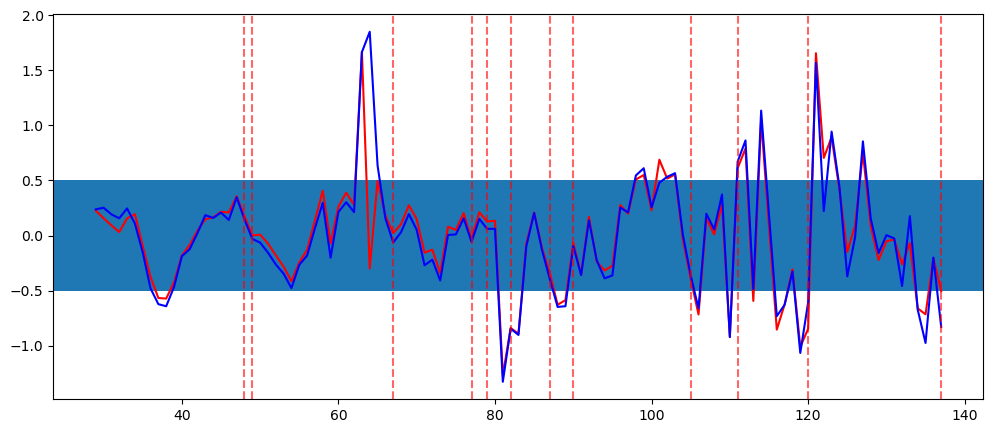

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(df['total_age'], df['food_resi_3lag']*3, color = 'red')
plt.plot(df['total_age'], df['water_resi_3lag'], color = 'blue')
for i, x in enumerate(x_mask):
    plt.axvline(x, color='red', linestyle='--', alpha=0.6, label='Event' if i == 0 else None)
plt.axhspan(-0.5, 0.5)
plt.show()

#### 逻辑回归

In [45]:
from sklearn.linear_model import LogisticRegression

model_sigmoid = LogisticRegression(
    # penalty='l2',
    C=0.2,
    solver='liblinear'
)

model_sigmoid.fit(X, y)

y_pred = model_sigmoid.predict(X)
y_prob = model_sigmoid.predict_proba(X)[:,1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_prob)

0.6400343642611684

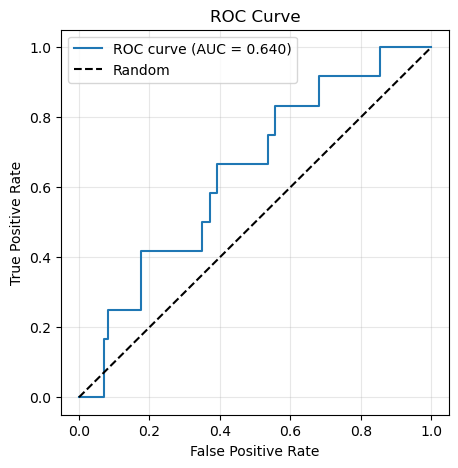

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算 ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# 绘图
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [47]:
from sklearn.svm import SVC

model_svc = SVC(
    kernel='linear',
    C=0.1,
    probability=True
)

model_svc.fit(X, y)

y_pred = model_svc.predict(X)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [49]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=5
)
model_dt.fit(X, y)

y_pred = model_dt.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    objective='binary:logistic',   # 0-1 分类，输出概率（sigmoid）
    n_estimators=100,              # 树的数量（小样本别太大）
    max_depth=3,                   # 树深度（非常关键）
    learning_rate=0.1,
    subsample=0.8,                 # 行采样，防过拟合
    colsample_bytree=0.8,          # 特征采样
    reg_alpha=0.0,                 # L1 正则
    reg_lambda=1.0,                # L2 正则
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [51]:
pred = model_xgb.predict(X)

In [52]:
y_pred_proba = model_xgb.predict_proba(X)[:,1]

from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
youden = tpr - fpr
best_threshold = thresholds[np.argmax(youden)]

best_threshold


0.13737676

In [53]:
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

In [54]:
from sklearn.metrics import accuracy_score, precision_score

# 假设 y 是真实标签，y_pred 是模型预测的 0/1 标签
# y_pred = model_xgb.predict(X)  # 或者交叉验证后的预测结果

# 计算准确率
acc = accuracy_score(y, y_pred_opt)

# 计算精确率（Precision = TP / (TP + FP)）
prec = precision_score(y, y_pred_opt)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")

Accuracy: 0.908
Precision: 0.550


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[97,  0],
       [12,  0]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        97
           1       0.00      0.00      0.00        12

    accuracy                           0.89       109
   macro avg       0.44      0.50      0.47       109
weighted avg       0.79      0.89      0.84       109



d:\Software\Anaconda3\envs\msc-dis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\Anaconda3\envs\msc-dis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\Anaconda3\envs\msc-dis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

# 假设 X, y 已准备好
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_predict 返回每个样本的预测概率
y_prob_cv = cross_val_predict(
    model_xgb,
    X, y,
    cv=cv,
    method='predict_proba'   # 取预测概率而不是标签
)[:, 1]  # 取正类概率

# 二分类预测标签（默认阈值 0.5）
y_pred_cv = (y_prob_cv > 0.5).astype(int)

# 计算常用指标
auc = roc_auc_score(y, y_prob_cv)
acc = accuracy_score(y, y_pred_cv)
prec = precision_score(y, y_pred_cv)

print(f"5-fold CV ROC-AUC: {auc:.3f}")
print(f"5-fold CV Accuracy: {acc:.3f}")
print(f"5-fold CV Precision: {prec:.3f}")


5-fold CV ROC-AUC: 0.530
5-fold CV Accuracy: 0.890
5-fold CV Precision: 0.500
